In [1]:
import pandas as pd 
import os
def get_data(filename):
    """
    This is function is to read csv files 
    and transfer into dataframe

    Parameters
    ----------
    filename : string
        the full name of that filename (path) 

    Returns
    -------
    None.

    """
    # df = pd.read_csv(f"{path}{filename}")
    df = pd.read_csv(filename)
    return df

In [2]:
df_data = get_data('diamonds.csv')

## Get familiar with the data

In [3]:
df_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [4]:
# print the sets 
cut_set = set(df_data['cut'])
color_set = set(df_data['color'])
color_sorted_set = sorted(color_set)
clarity_set = set(df_data['clarity'])
print('cut sets: ',cut_set)
print('color sets: ',color_sorted_set)
print('clarity sets: ',clarity_set)
# Cut: Fair, Good, Very Good, Premium, Ideal
# Color: J < I < H < G < F < E < D 
# Clarity: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

cut sets:  {'Premium', 'Very Good', 'Ideal', 'Fair', 'Good'}
color sets:  ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity sets:  {'VS2', 'VS1', 'IF', 'VVS1', 'SI2', 'VVS2', 'SI1', 'I1'}


In [5]:
print(df_data.shape)
print(df_data.info())

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


## 3.1.1 Handling Categorical Features

In [6]:
def cut_to_categ(df_data):
    for i in range(len(df_data['cut'])):
        if df_data['cut'][i] == 'Fair':
            df_data['cut'][i] = 1
        elif df_data['cut'][i] == 'Good':
            df_data['cut'][i] = 2
        elif df_data['cut'][i] == 'Very Good':
            df_data['cut'][i] = 3
        elif df_data['cut'][i] == 'Premium':
            df_data['cut'][i] = 4
        else:
            df_data['cut'][i] = 5     
    return df_data

def color_to_categ(df_data):
    data = df_data['color']
    for i in range(len(data)):
        if data[i] == 'J':
            data[i] = 1
        elif data[i] == 'I':
            data[i] = 2
        elif data[i] == 'H':
            data[i] = 3
        elif data[i] == 'G':
            data[i] = 4
        elif data[i] == 'F':
            data[i] = 5   
        elif data[i] == 'E':
            data[i] = 6                
        else: #D 
            data[i] = 7     
    df_data['color'] = data
    return df_data  

def clarity_to_categ(df_data):
    data = df_data['clarity']
    for i in range(len(data)):
        if data[i] == 'I1':
            data[i] = 1
        elif data[i] == 'SI2':
            data[i] = 2
        elif data[i] == 'SI1':
            data[i] = 3
        elif data[i] == 'VS2':
            data[i] = 4
        elif data[i] == 'VS1':
            data[i] = 5   
        elif data[i] == 'VVS2':
            data[i] = 6       
        elif data[i] == 'VVS1':
            data[i] = 7
        else: # IF 
            data[i] = 8     
    df_data['clarity'] = data
    return df_data

In [7]:
df_data = df_data.drop(["Unnamed: 0"], axis=1)
df_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3934.801557,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.442321,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,327.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 3.200000000000017, 'Cut')

<Figure size 864x576 with 0 Axes>

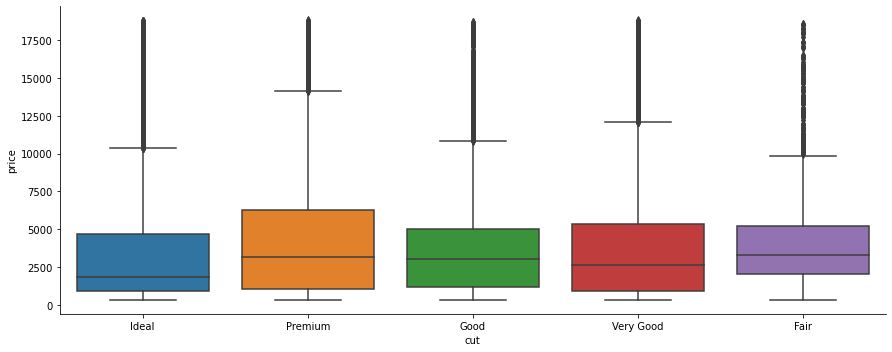

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.factorplot(x='cut', y='price', data=df_data, kind='box' ,aspect=2.5)
ax.set_title("Factorplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 3.200000000000017, 'Color')

<Figure size 864x576 with 0 Axes>

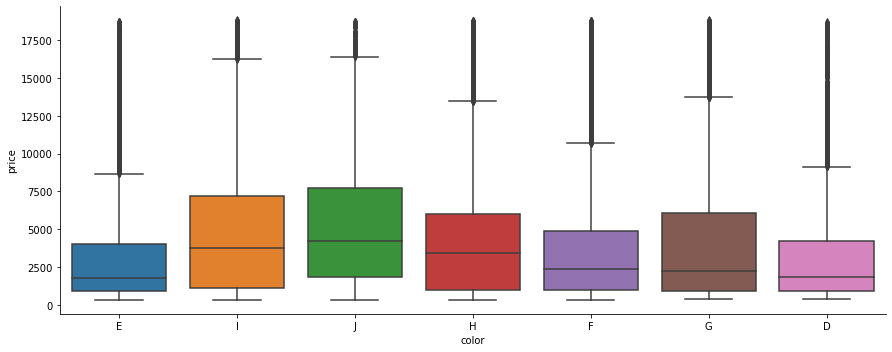

In [34]:
plt.figure(figsize=(12,8))
sns.factorplot(x='color', y='price', data=df_data, kind='box' ,aspect=2.5)
ax.set_title("Factorplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

Text(0.5, 3.200000000000017, 'Clarity')

<Figure size 864x576 with 0 Axes>

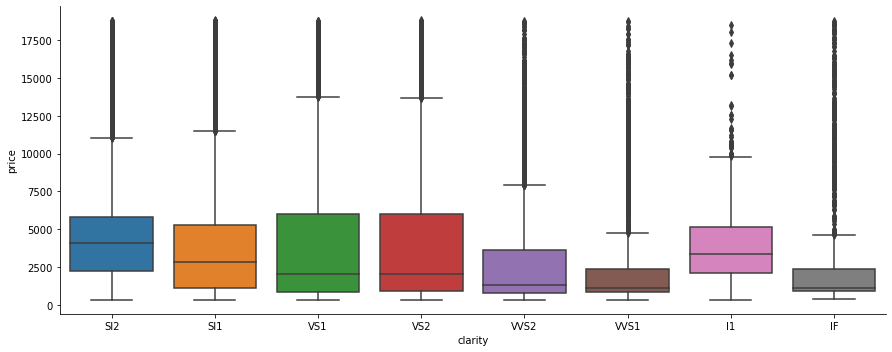

In [36]:
plt.figure(figsize=(12,8))
sns.factorplot(x='clarity', y='price', data=df_data, kind='box' ,aspect=2.5)
ax.set_title("Factorplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

In [25]:
df_data = df_data.drop(df_data[df_data["x"]==0].index)
df_data = df_data.drop(df_data[df_data["y"]==0].index)
df_data = df_data.drop(df_data[df_data["z"]==0].index)
df_data.shape

(53920, 10)

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_data = df_data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,330,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,327,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,328,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,337,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,338,4.34,4.35,2.75


In [21]:
label_data.to_csv('preprocess_diamonds.csv')

## 3.1.2 Standardization (Questions 1)

## Question 2

In [22]:
feature_columns = list(label_data.columns)
print(feature_columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


Correlation Matrix Heatmap:


<AxesSubplot:>

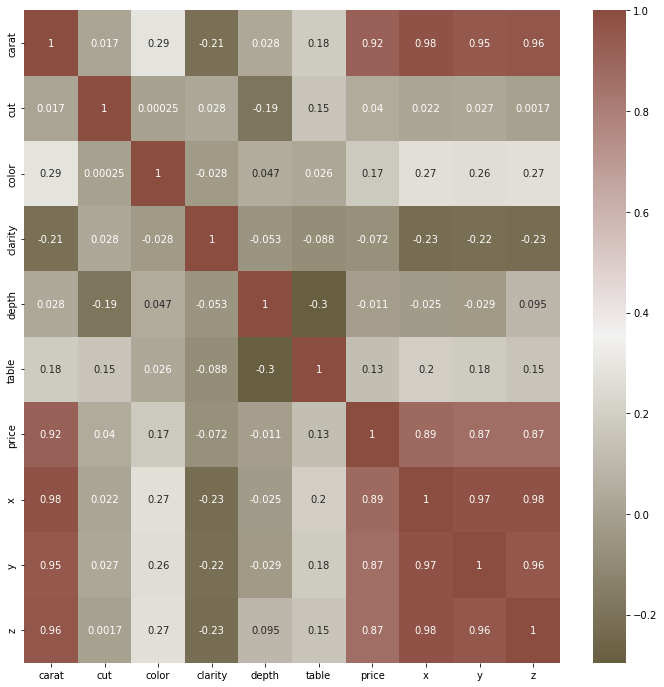

In [29]:
print('Correlation Matrix Heatmap:')
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [30]:
CM = label_data[feature_columns].corr()
print(CM['price'])
print('The high correlation is: Carat', CM['price']['carat'])

carat      0.921592
cut        0.039889
color      0.172429
clarity   -0.071570
depth     -0.010729
table      0.127245
price      1.000000
x          0.887232
y          0.867865
z          0.868207
Name: price, dtype: float64
The high correlation is: Carat 0.9215922200723019


Based on the info: 
    
- "carat","x", "y" and "z" show a high correlation to the target column. 
- "depth", "cut" and "table" show low correlation. We could consider dropping it

## Question 3

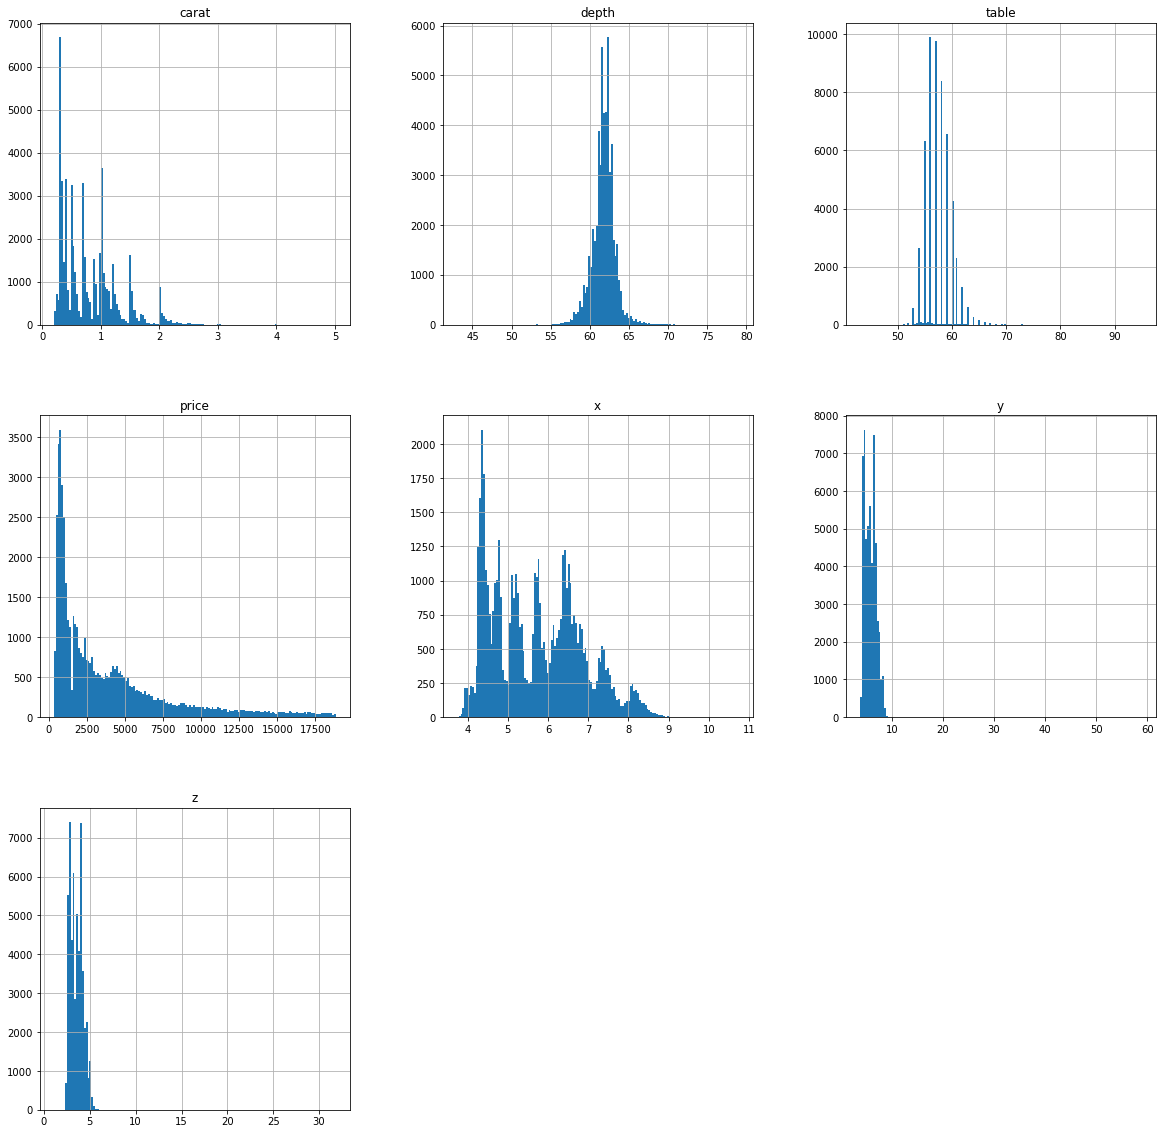

In [41]:
hist_plots = df_data.hist(figsize = (20,20),bins=150)

## Question 4

In [71]:
# Get list of categorical variables
s = (df_data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [42]:
def box_plot(feature,target,df_data):
    fig, ax1  = plt.subplots(figsize=(7, 5))

    #feature = 'carat'
    #target = 'price'
    title_name = feature + ' vs ' + target

    props = dict(widths=0.8,patch_artist=True, medianprops=dict(color="gold"))
    box1=ax1.boxplot(df_data[feature], positions=[0], **props)

    ax2 = ax1.twinx()
    box2=ax2.boxplot(df_data[target],positions=[1], **props)

    # ax1.set_xticks(range(len(df.columns)))
    # ax1.set_xticklabels(df.columns)

    for b in box1["boxes"]+box2["boxes"]:
        b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
    plt.title(title_name)
    plt.show()
    

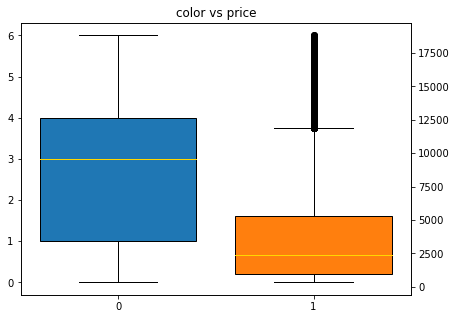

In [44]:
box_plot('color','price',label_data)

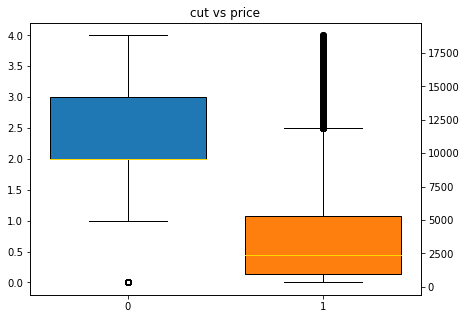

In [45]:
box_plot('cut','price',label_data)

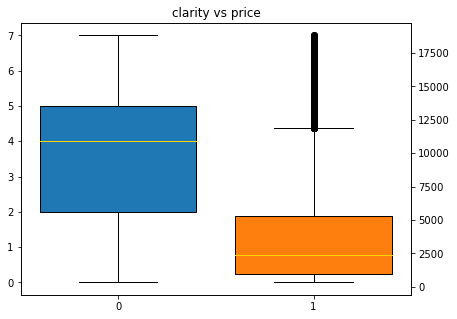

In [46]:
box_plot('clarity','price',label_data)

## Question 5: plot the counts by color, cut and clarity

In [49]:
from collections import Counter
def cout_plot(title_name,data_name,df_data):
    data = df_data[data_name]
    count = Counter(data)
    
    plt.bar(count.keys(),count.values())
    plt.title(title_name)
    plt.xlabel(data_name)
    plt.ylabel('Conut numbers')
    plt.grid(axis='y', alpha=0.75,linestyle='-.')

### cut count plot

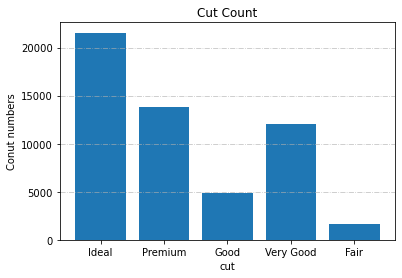

In [53]:
title_name = 'Cut Count'
data_name = 'cut'
cout_plot(title_name,data_name,df_data)

### Color count plot

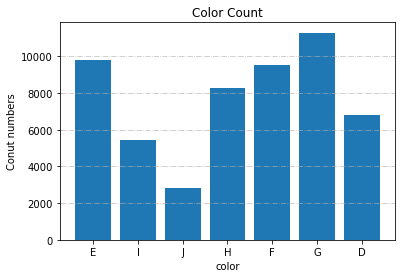

In [54]:
title_name = 'Color Count'
data_name = 'color'
cout_plot(title_name,data_name,df_data)

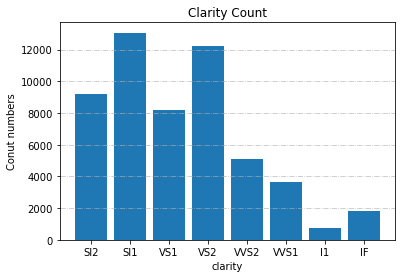

In [56]:
title_name = 'Clarity Count'
data_name = 'clarity'
cout_plot(title_name,data_name,df_data)

## Question 7

In [304]:
!pip install scikit-learn

In [61]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
import numpy as np

In [62]:
feature_columns = list(label_data.columns)
print(feature_columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


In [63]:
np.set_printoptions(suppress=True)

In [68]:
def sort_score(reg_score):
    reg_dict = {}
    for i in range(len(reg_score)):
        reg_dict[feature_columns[i]] = reg_score[i]  
    sorted_reg = dict(sorted(reg_dict.items(), key=lambda item: item[1]))    
    return sorted_reg

def feature_selection(feature_columns,df_data,target):
    mu_reg_score = mutual_info_regression(df_data[feature_columns],df_data[target])
    f_reg_score = f_regression(df_data[feature_columns],df_data[target])
    
    sorted_mu_reg = sort_score(mu_reg_score)
    sorted_f_reg_1 = sort_score(f_reg_score[0]) # f-statistic for each feature
    sorted_f_reg_2 = sort_score(f_reg_score[1]) # P - values
    return sorted_mu_reg,sorted_f_reg_1,sorted_f_reg_2
    

In [69]:
sorted_mu_reg,sorted_f_reg_f, sorted_f_reg_p= feature_selection(feature_columns,label_data,'price')

In [70]:
print('mutual_regression scorted scores:')
print(sorted_mu_reg)
print('_'*30)
print('f_regression scorted f-scores:')
print(sorted_f_reg_f)
print('_'*20)
print('f_regression scorted p-scores:')
print(sorted_f_reg_p)

mutual_regression scorted scores:
{'depth': 0.0324568584424636, 'table': 0.03676325509648137, 'cut': 0.055915102079844736, 'color': 0.13874970873479553, 'clarity': 0.21691648807916541, 'z': 1.3605196457087203, 'x': 1.41277755520961, 'y': 1.4235812795451528, 'carat': 1.6524170080366933, 'price': 8.642313761588863}
______________________________
f_regression scorted f-scores:
{'depth': 6.207678050971522, 'cut': 85.92902767959485, 'clarity': 277.60557163012913, 'table': 887.3703450480704, 'color': 1652.2014188334767, 'y': 164541.42227573952, 'z': 165068.30442914617, 'x': 199433.01899551536, 'carat': 303942.18772559805, 'price': 2.4282508470856234e+20}
____________________
f_regression scorted p-scores:
{'carat': 0.0, 'color': 0.0, 'price': 0.0, 'x': 0.0, 'y': 0.0, 'z': 0.0, 'table': 2.0387284985433523e-193, 'clarity': 3.574028415199203e-62, 'cut': 1.931526829069802e-20, 'depth': 0.012722718010927541}


Interms of the dependency, the top 4 features are:

    - carat
    - y
    - x
    - z

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to reduce the performance of the model.

If we consider all the features into our model, it could be possible that we will increase accuracy since the price consider not only carat,y,x,z, but also caregorical features like: clarity, color and cut.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Prepare data

In [85]:
def prepare_data(all_data,selected_features,label_data):
    if all_data == True:
        X = label_data.drop(["price"],axis =1)
    else:
        X = label_data[selected_features]
    y = label_data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [86]:
selected_features = ['carat','x','y','z']
X_train,X_val,X_test,y_train,y_val,y_test = prepare_data(True,selected_features,label_data)
X_train_sel,X_val_sel,X_test_sel,y_train_sel,y_val_sel,y_test_sel = prepare_data(False,selected_features,label_data)

In [91]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
37957,0.41,2,2,4,62.6,55.0,4.75,4.77,2.98
39806,0.38,2,2,6,61.9,55.0,4.67,4.70,2.90
37724,0.34,3,3,7,61.2,59.0,4.50,4.46,2.74
30491,0.31,2,0,2,61.7,57.0,4.38,4.34,2.69
25833,2.06,3,4,2,62.4,59.0,8.11,8.07,5.05


In [92]:
X_train_sel.head()

,carat,x,y,z
37957,0.41,4.75,4.77,2.98
39806,0.38,4.67,4.70,2.90
37724,0.34,4.50,4.46,2.74
30491,0.31,4.38,4.34,2.69
25833,2.06,8.11,8.07,5.05


In [493]:
sc=StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Linear regression model

In [107]:
# build the LR model

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier1",LinearRegression())])

pipeline_lr_rid=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier1",Ridge(alpha=.5))])

pipeline_lr_las=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier1",Lasso(alpha=.5))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lr_rid, pipeline_lr_las]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "Ridge", 2: "Lasso"}



In [108]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_sel, y_train_sel)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_sel,y_train_sel,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1707.768811 
Ridge: -1704.548228 
Lasso: -1665.677588 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+10, tolerance: 4.913e+07
  model = cd_fast.enet_coordinate_descent(


In [98]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.049e+08, tolerance: 5.482e+07
  model = cd_fast.enet_coordinate_descent(


LinearRegression: -1480.738011 
Ridge: -1478.103597 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.507e+08, tolerance: 4.909e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+09, tolerance: 4.947e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Lasso: -1437.839255 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.535e+08, tolerance: 4.924e+07
  model = cd_fast.enet_coordinate_descent(


In [110]:
# Model Evaluation

def performance_eval(model,model_name,X_test,y_test):
    # Model prediction on test data
    pred = model.predict(X_test)
    print('Performance of ' + model_name)
    print("R^2:",metrics.r2_score(y_test, pred))
    print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    print("MAE:",metrics.mean_absolute_error(y_test, pred))
    print("MSE:",metrics.mean_squared_error(y_test, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('-' * 30)

In [112]:
performance_eval(pipeline_lr,'pipeline_lr',X_val_sel,y_val_sel)
performance_eval(pipeline_lr_rid,'pipeline_lr',X_val_sel,y_val_sel)
performance_eval(pipeline_lr_las,'pipeline_lr',X_val_sel,y_val_sel)

Performance of pipeline_lr
R^2: 0.8525565600661343
Adjusted R^2: 0.8524881646399792
MAE: 877.1142592869644
MSE: 2325974.9212733437
RMSE: 1525.114723971067
------------------------------
Performance of pipeline_lr
R^2: 0.8525593546013316
Adjusted R^2: 0.8524909604714934
MAE: 877.2217836964222
MSE: 2325930.836444691
RMSE: 1525.1002709476813
------------------------------
Performance of pipeline_lr
R^2: 0.852565039336343
Adjusted R^2: 0.8524966478435151
MAE: 878.5390963983841
MSE: 2325841.157642592
RMSE: 1525.0708697115003
------------------------------


## Question 14

In [ ]:
pipeline_lr_poly=Pipeline([("scalar2",StandardScaler()),("ploynomial",PolynomialFeatures()),
                     ("lr_classifier2",LinearRegression())])



## Neural Network 

## Question 15

Since neural network is made up with lost of neuro, and for each neuro(perceptron), it's a linear regression model which contains parameters $w_i$ and bias $b_i$. Therefore, all these neuro combine together, the neuro network can not only predict the linear model but also it can predict some very complicated models with arbitrary shapes.  

#### default MLPRegressor model:

sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [103]:
# build the NN model 


pipeline_mlp=Pipeline([("scalar",StandardScaler()),
                     ("MLPRegression",MLPRegressor())])


# List of all the pipelines
pipelines_mlp = [pipeline_mlp]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "MLPRegression"}

In [104]:
# Fit the pipelines
for pipe in pipelines_mlp:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines_mlp):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLPRegression: -1176.605138 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
performance_eval(pipeline_lr,'pipeline_lr',X_val,y_val)

Performance of pipeline_lr
R^2: 0.8814536441787213
Adjusted R^2: 0.8813298431573252
MAE: 854.8233139567484
MSE: 1870112.7074376398
RMSE: 1367.5206424173787
------------------------------


## Question 16

### First increase the depth

In [125]:
clf_default = MLPRegressor()
clf1 = MLPRegressor(hidden_layer_sizes=(100,3), activation='relu',random_state=1, alpha=0.001, batch_size='auto', max_iter=300)
clf2 = MLPRegressor(hidden_layer_sizes=(100,5), activation='relu',random_state=1, alpha=0.001, batch_size='auto', max_iter=300)
clf3 = MLPRegressor(hidden_layer_sizes=(300,3), activation='relu',random_state=1, alpha=0.001, batch_size='auto', max_iter=300)
clf4 = MLPRegressor(hidden_layer_sizes=(300,5), activation='relu',random_state=1, alpha=0.001, batch_size='auto', max_iter=300)

In [127]:
# List of all the pipelines
pipeline_mlp0=Pipeline([("scalar",StandardScaler()),
                     ("MLP_default",clf_default)])
pipeline_mlp1=Pipeline([("scalar",StandardScaler()),
                     ("MLP1",clf1)])
pipeline_mlp2=Pipeline([("scalar",StandardScaler()),
                     ("MLP2",clf2)])
pipeline_mlp3=Pipeline([("scalar",StandardScaler()),
                     ("MLP2",clf3)])
pipeline_mlp4=Pipeline([("scalar",StandardScaler()),
                     ("MLP2",clf4)])

pipelines_mlps = [pipeline_mlp,pipeline_mlp1,pipeline_mlp2,pipeline_mlp3,pipeline_mlp4]
pipelines_mlps_test = [pipeline_mlp,pipeline_mlp1]
# Dictionary of pipelines and model types for ease of reference
pipe_mlps_dict = {0: "MLP_default",1:"MLP1",2:"MLP2",3:"MLP3",4:"MLP4"}

In [123]:
# Fit the pipelines
for pipe in pipelines_mlps_test:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines_mlps_test):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP_default: -1173.092179 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP1: -1165.733307 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
for i in range(len(pipelines_mlps)):    
    performance_eval(pipelines_mlps[i],pipe_dict[i],X_val,y_val)

Performance of MLP_default
R^2: 0.9254573825850112
Adjusted R^2: 0.9253795358042344
MAE: 585.7560408286965
MSE: 1175937.4221810566
RMSE: 1084.406483833925
------------------------------
Performance of MLP1
R^2: 0.9384579702867457
Adjusted R^2: 0.9383937003555065
MAE: 514.8682039389835
MSE: 970848.3319535607
RMSE: 985.3163613548496
------------------------------


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [128]:
# Fit the pipelines
for pipe in pipelines_mlps:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines_mlps):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_mlps_dict[i], cv_score.mean()))

/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP_default: -1178.709256 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP1: -1165.733307 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP2: -1131.038854 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP3: -1269.848473 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

MLP4: -1289.174772 


/opt/anaconda3/envs/myCourse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
for i in range(len(pipelines_mlps)):    
    performance_eval(pipelines_mlps[i],pipe_dict[i],X_val,y_val)

Performance of MLP_default
R^2: 0.924962054887244
Adjusted R^2: 0.9248836908229583
MAE: 591.7785567576268
MSE: 1183751.400228064
RMSE: 1088.003400834788
------------------------------
Performance of MLP1
R^2: 0.9384579702867457
Adjusted R^2: 0.9383937003555065
MAE: 514.8682039389835
MSE: 970848.3319535607
RMSE: 985.3163613548496
------------------------------
Performance of MLP2
R^2: 0.9532389396783932
Adjusted R^2: 0.9531901058952772
MAE: 452.0458042951005
MSE: 737673.0605918632
RMSE: 858.878955727676
------------------------------
Performance of MLP3
R^2: 0.9525517440172685
Adjusted R^2: 0.9525021925779734
MAE: 448.63972325160756
MSE: 748513.8268850328
RMSE: 865.1669358482401
------------------------------
Performance of MLP4
R^2: 0.9553108281237779
Adjusted R^2: 0.9552641580672815
MAE: 453.29457721948836
MSE: 704988.2523304577
RMSE: 839.6357855227811
------------------------------


## Question 17

I used the Relu function $ f(x) = max(0, x) $ as the activation function since all the features ('carat','clarity','cut','color') and target ('price') are positive value number. 

## Question 18

When training a very deep neural network, as the number of layers increases, one of the risk is that he derivative will drop exponentially, causing the gradient to disappear. Or exponentially increasing, leading to gradient explosion; the essence is the high power of the matrix caused by the chain rule of gradient transfer (back propagation will multiply the partial derivatives of the function layer by layer).

The exponential decrease in gradients (values less than 1.0) between layers of the network resulting in repeated multiplication of gradients will produce vanishing gradients. Therefore, eventually, as the depth of the neuro network increases, the accuracy will not increase and on the contrary， it will decrease, just like some really deep CNN. That's also why ResNet solve such a problem and got so famous. 


In [ ]:
## Random forest
n_trees = [100,10,50]
rf_0 = RandomForestRegressor(n_estimators = n_trees[0],max_depth = None,max_features="auto")
rf_1 = RandomForestRegressor(n_estimators = n_trees[1],max_depth = None,max_features="auto")
rf_2 = RandomForestRegressor(n_estimators = n_trees[2],max_depth = None,max_features="auto")

pipeline_rf_0=Pipeline([("scalar2",StandardScaler()),
                     ("rf_classifier_default",rf_0)])
pipeline_rf_1=Pipeline([("scalar2",StandardScaler()),
                     ("rf_classifier_1",rf_1)])
pipeline_rf_2=Pipeline([("scalar2",StandardScaler()),
                     ("rf_classifier_2",rf_2)])

pipelines_rfs = [pipeline_rf_0,pipeline_rf_1,pipeline_rf_2]
pipe_rf_dict = {0:"rf_classifier_default",1:"rf_classifier_1",2:"rf_classifier_2"}

In [ ]:
# Fit the pipelines
for pipe in pipelines_rfs:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines_rfs):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_rf_dict[i], cv_score.mean()))

In [ ]:
# Model Evaluation

def performance_eval(model,model_name,X_test,y_test):
    # Model prediction on test data
    pred = model.predict(X_test)
    print('Performance of ' + model_name)
    print("OOB score:", model.obb_score_)
    print("OOB error:", 1- model.obb_score_ )
    print("R^2:",metrics.r2_score(y_test, pred))
    print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    print("MAE:",metrics.mean_absolute_error(y_test, pred))
    print("MSE:",metrics.mean_squared_error(y_test, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('-' * 30)

## Question 25

In [179]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [182]:
clf_lr = LinearRegression()
kf = KFold(n_splits=10)
sc=StandardScaler()
acc_score = []
rmse_i = []
for train_index , test_index in kf.split(X_train):
    X_trainset , X_testset = X_train.iloc[train_index,:],X_train.iloc[test_index,:]
    y_trainset , y_testset = y_train.iloc[train_index] , y_train.iloc[test_index]
    clf_lr.fit(X_trainset,y_trainset)
    y_predictset = model.predict(X_testset)
    rmse_i.append(np.sqrt(metrics.mean_squared_error(y_testset, y_predictset)))
print("RMSE:",np.mean(rmse_i))

RMSE: 839.8331265026964


In [177]:
performance_eval(clf_lr,'LinearRegression()',X_val,y_val)

Performance of LinearRegression()
R^2: 0.8814239641262298
Adjusted R^2: 0.8813001321091882
MAE: 853.3402714769408
MSE: 1870580.921267894
RMSE: 1367.6918224760627
------------------------------


## Question 26

he OOBscore works only with bootstrapping.
Bootstrapping means that we are not using our full dataset to train the model.
Instead we randomly choose about 62.5% of our data. That means they will be unused rows.
This unused rows can be used a validation for a model and we can see how good is our model when trying to predict unknown data.

So if we have both the R2 from validation set and OOBscore they should not be different by a big amount. They both show performance of our model in case of new data.